In [1]:
import numpy as np
import pandas as pd
import re
%matplotlib inline


In [2]:
train = pd.read_csv('./input/train.csv', header = 0, dtype={'Age': np.float64})
test  = pd.read_csv('./input/test.csv' , header = 0, dtype={'Age': np.float64})
full_data = [train, test]

print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [3]:
print(train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [4]:
print(train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [5]:
## new feature: family size
for dataset in full_data:
    print(type(dataset))
    dataset["FamilySize"] = dataset['SibSp'] + dataset['Parch'] + 1
#print(train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [6]:
print(type(full_data))
#print(full_data[:5])

<class 'list'>


In [7]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print(train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [8]:
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).count())
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

print ("Null: ", sum(pd.isnull(train['Embarked'])))
## alternative: mis_val = train[['Embarked']].isnull().sum()
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C       168
1        Q        77
2        S       644
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
Null:  2
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [9]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
print(train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index = False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [10]:
for dataset in full_data:
    dataset_age = dataset['Age'] 
    age_avg = dataset_age.mean()
    age_std = dataset_age.std()
    age_null_count = dataset_age.isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg-age_std, 
                                             age_avg+age_std,
                                             size=age_null_count)
    #print(age_null_random_list.shape)
    #print(sum(list(np.isnan(dataset_age))))
    dataset_age[np.isnan(dataset_age)] = age_null_random_list.copy()
    dataset_age = dataset_age.astype(int)
    
train['CategoricalAge'] = pd.cut(train['Age'], 5)

print (train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())    

     CategoricalAge  Survived
0    (0.34, 16.336]  0.530435
1  (16.336, 32.252]  0.351981
2  (32.252, 48.168]  0.370787
3  (48.168, 64.084]  0.434783
4    (64.084, 80.0]  0.090909


/Users/udothemath1984/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [11]:
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
    
print(pd.crosstab(train['Title'], train['Sex']))
print(dataset.Name)

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1
0                                       Kelly, Mr. James
1                       Wilkes, Mrs. James (Ellen Needs)
2                              Myles, Mr. Thomas Francis
3                                       Wirz, Mr. Albert
4           Hirvonen, Mrs. Alexander (Helga E Lindqvist)
5                             Svensson, Mr. Johan Cervin
6                                   Connolly, Miss. Kate
7                           Caldwell, Mr. Albert Francis
8              Abrahim, Mrs. Joseph (Sophie Halaut Easu)
9                                Davies, Mr. John 

In [12]:
## replacing the unusual title
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [13]:
print(train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [14]:
## data cleaning
for dataset in full_data:
    dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1}).astype(int)
    
    # Mapping title
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
                 'Parch', 'FamilySize']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

test  = test.drop(drop_elements, axis = 1)

print (train.head(10))

    


   Survived  Pclass  Sex  Age  Fare  Embarked  IsAlone  Title
0         0       3    1  1.0     0         0        0      1
1         1       1    0  2.0     3         1        0      3
2         1       3    0  1.0     1         0        1      2
3         1       1    0  2.0     3         0        0      3
4         0       3    1  2.0     1         0        1      1
5         0       3    1  1.0     1         2        1      1
6         0       1    1  3.0     3         0        1      1
7         0       3    1  0.0     2         0        0      4
8         1       3    0  1.0     1         0        0      3
9         1       2    0  0.0     2         1        0      3


In [15]:
train = train.values
test  = test.values

In [28]:
## classifier Comparison

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression


(891, 7)
(891,)


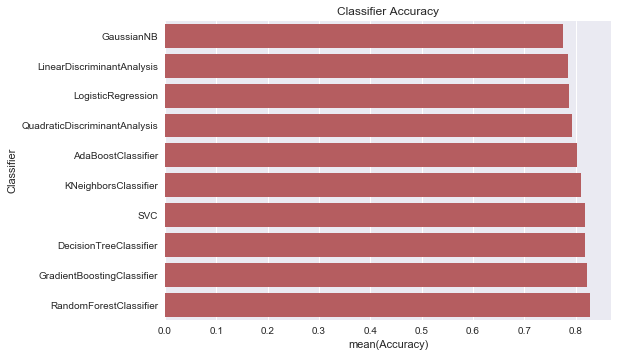

In [57]:
classifier = [KNeighborsClassifier(3),
              SVC(probability=True),
              DecisionTreeClassifier(),
              RandomForestClassifier(),
              AdaBoostClassifier(),
              GradientBoostingClassifier(),
              GaussianNB(),
              LinearDiscriminantAnalysis(),
              QuadraticDiscriminantAnalysis(),
              LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train[0::, 1::]
y = train[0::, 0]

print(X.shape)
print(y.shape)
acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for clf in classifier:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_prediction = clf.predict(X_test)
        acc = accuracy_score(y_test, train_prediction)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("deep")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values('Accuracy'), color='r')


In [58]:
print(log.sort_values('Accuracy'))

                      Classifier  Accuracy
0                     GaussianNB  0.775556
0     LinearDiscriminantAnalysis  0.784444
0             LogisticRegression  0.786667
0  QuadraticDiscriminantAnalysis  0.793333
0             AdaBoostClassifier  0.802222
0           KNeighborsClassifier  0.810000
0                            SVC  0.817778
0         DecisionTreeClassifier  0.817778
0     GradientBoostingClassifier  0.821111
0         RandomForestClassifier  0.827778


In [61]:
candidate_classifier = SVC()
candidate_classifier.fit(train[:, 1:], train[:, 0])
result = candidate_classifier.predict(test)
print(result)

[ 0.  1.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.  1.  0.  0.
  0.  1.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  1.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.
  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  0.  1.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  0.
  1.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.
  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.
  0.  1.  1.  1.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  1